In [1]:
# code for automatically reloading changes from modules (used for testing)
%load_ext autoreload
%autoreload 2

In [2]:
import qnexus
from quantinuum_schemas.models.backend_config import QuantinuumCompilerOptions
from arbrb import ArbRB_Experiment

In [ ]:
# login to Nexus

qnexus.login_with_credentials()

In [24]:
# choose nexus project and define quantinuum backend config

project = qnexus.projects.get_or_create(name='test-arbrb-project')
qnexus.context.set_active_project(project)

priority = 'normal'
compiler_options = QuantinuumCompilerOptions(priority=priority)

quantinuum_config = qnexus.QuantinuumConfig(device_name='Helios-1E', max_cost=1000000, compiler_options={"max-qubits": 16})

In [ ]:
# select parameters and build experiment
from datetime import datetime

qubits = [(q, q+1) for q in range(0, 16, 2)]
seq_len = [4, 10]
seq_reps = 2
ZZ_angle = [-1/4, -1/2]
filename = f'exp_arbrb_Helios-1E_{datetime.today()}.p'

exp = ArbRB_Experiment(qubits, seq_len, seq_reps,
                          ZZ_angle=ZZ_angle, filename=filename)
exp.add_circuits()

In [26]:
# # or load an existing experiment

# filename = f'exp_arbrb_example.p'
# exp = ArbRB_Experiment.load(filename)

In [27]:
# select shots and submit experiment, returns a reference to the execution job

shots = 100
backend_config = quantinuum_config

ref_execute_job = exp.submit(shots, backend_config=backend_config, shuffle=True)
exp.save()

Experiment saved! exp_arbrb_Helios-1_2025-12-12 13:09:59.025010.p
Experiment saved! exp_arbrb_Helios-1_2025-12-12 13:09:59.025010.p


In [22]:
# inspect status of the execution job

qnexus.jobs.status(ref_execute_job)

JobStatus(status=<JobStatusEnum.QUEUED: 'QUEUED'>, message='The job is queued.', error_detail=None, completed_time=None, queued_time=datetime.datetime(2025, 12, 12, 18, 53, 12, 945643, tzinfo=datetime.timezone.utc), submitted_time=datetime.datetime(2025, 12, 12, 18, 53, 12, 133534, tzinfo=datetime.timezone.utc), running_time=None, cancelled_time=None, error_time=None, queue_position=None, cost=40.0)

In [28]:
# retrieve results

exp.retrieve(ref_execute_job)

Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider 

Experiment saved! exp_arbrb_Helios-1_2025-12-12 13:09:59.025010.p


/Users/charles.baldwin/Documents/GitHub/circuit-benchmarks-guppy/arbrb.py:531: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x, y, p0=[0.9, 0.9], bounds=([0,0], [1,1]), sigma=yerr)
/Users/charles.baldwin/Documents/GitHub/circuit_benchmarks/circ_benchmarks/tools/analysis_tools.py:133: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x, y, p0=[0.75, 0.9], bounds=([0,0], [1,1]))
/Users/charles.baldwin/Documents/GitHub/circuit-benchmarks-guppy/analysis_tools.py:182: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x, y, p0=[0.7, 0.9], bounds=([0,0], [0.75,1]))
/Users/charles.baldwin/Documents/GitHub/circuit-benchmarks-guppy/analysis_tools.py:233: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, seq_len, y, p0=[0.7, 0.9], bounds=([0,0], [0.75,1]))


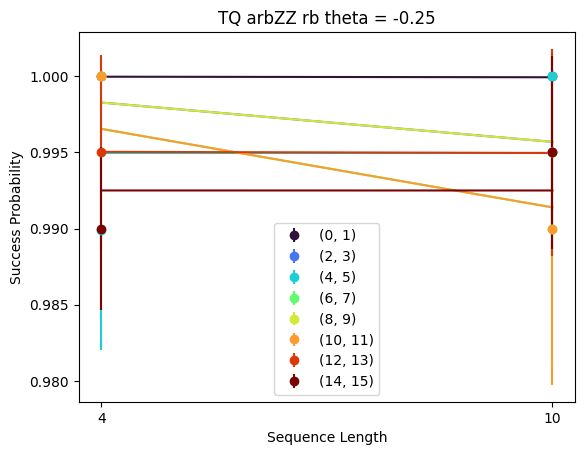

/Users/charles.baldwin/Documents/GitHub/circuit-benchmarks-guppy/analysis_tools.py:233: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, seq_len, y, p0=[0.7, 0.9], bounds=([0,0], [0.75,1]))


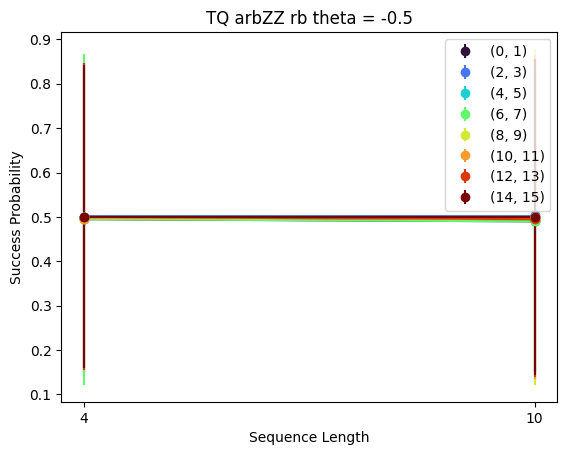

/Users/charles.baldwin/Documents/GitHub/circuit-benchmarks-guppy/arbrb.py:427: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x, y)


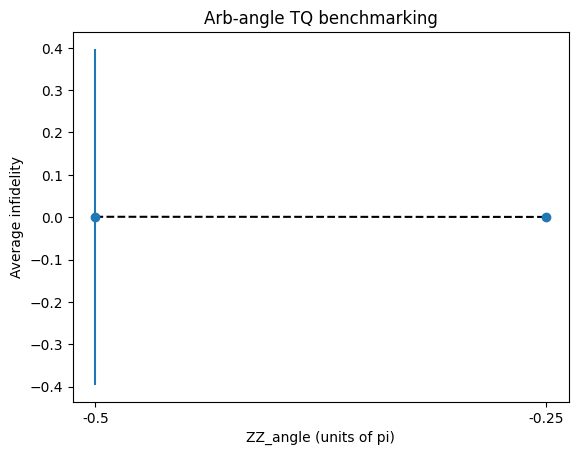

/Users/charles.baldwin/Documents/GitHub/circuit-benchmarks-guppy/arbrb.py:311: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x, y, p0=[0.4, 0.9], bounds=([0,0], [1,1]), sigma=yerr)


fit params (linear model): a*x+b

a =  -0.00134 +/- inf
b =  0.0003 +/- inf


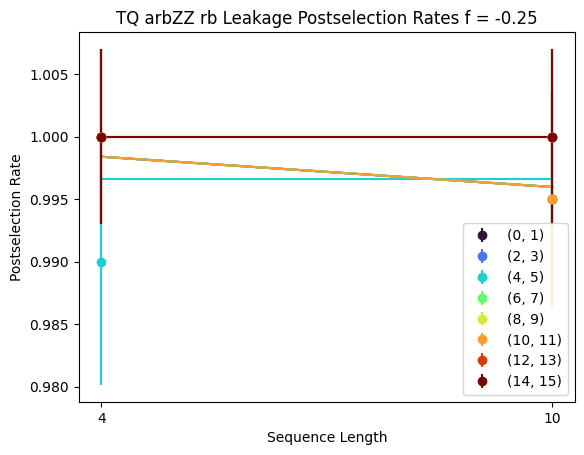

/Users/charles.baldwin/Documents/GitHub/circuit-benchmarks-guppy/arbrb.py:311: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x, y, p0=[0.4, 0.9], bounds=([0,0], [1,1]), sigma=yerr)


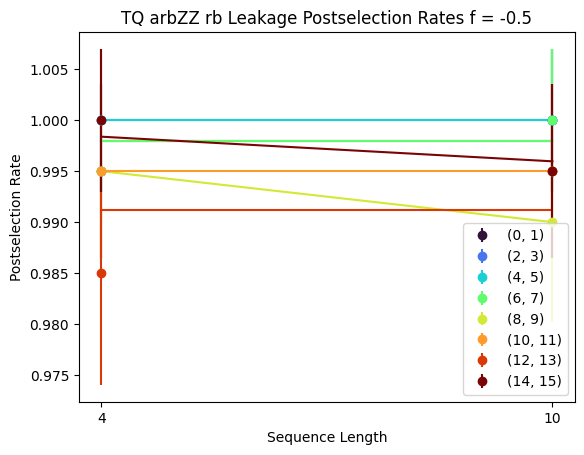


Theta = -0.25 Average Fidelities
----------------------------------
qubits (0, 1): 0.99998 +/- 0.0
qubits (2, 3): 0.99916 +/- 0.00054
qubits (4, 5): 1.0 +/- 0.0
qubits (6, 7): 0.99832 +/- 0.00075
qubits (8, 9): 0.99916 +/- 0.00057
qubits (10, 11): 0.99832 +/- 0.00089
qubits (12, 13): 0.99998 +/- 0.00062
qubits (14, 15): 1.0 +/- 0.00058
----------------------------------
Zone average:  0.99957 +/- 0.00021

Theta = -0.5 Average Fidelities
----------------------------------
qubits (0, 1): 0.99745 +/- 0.28529
qubits (2, 3): 1.0 +/- 0.29866
qubits (4, 5): 0.99998 +/- 0.27134
qubits (6, 7): 0.99743 +/- 0.28856
qubits (8, 9): 0.99998 +/- 0.28595
qubits (10, 11): 1.0 +/- 0.26718
qubits (12, 13): 0.99745 +/- 0.29146
qubits (14, 15): 0.99997 +/- 0.25273
----------------------------------
Zone average:  0.99919 +/- 0.09917


In [29]:
# analyze results

exp.analyze_results()

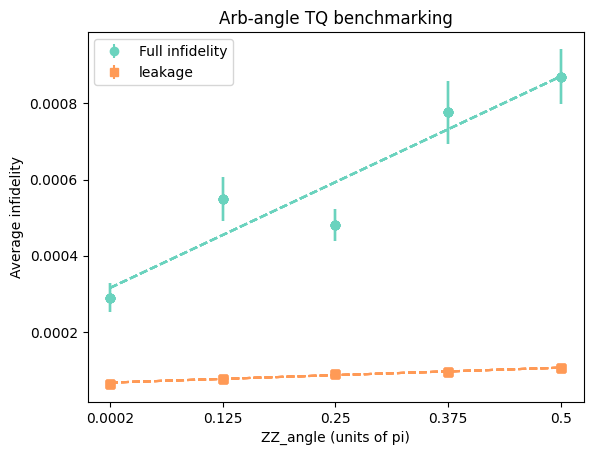

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

qtm_hex = [
    '#E1F6F2', '#A5E5D7', '#6AD3BE', '#30A08E', '#1D605B',
    '#E6E0EC', '#B3A2C7', '#8064A2', '#604A7B', '#403152',
    '#FCDFE4', '#F59EAF', '#E75D72', '#BB4658', '#7C3349',
    '#FFEBDD', '#FFC29A', '#FF9A56', '#E5803C', '#92542A',
    '#c3e1ee', '#96cae1', '#69B3D4', '#548faa', '#4a7d94',
    '#fff2b3', '#ffea81', '#FED402', '#cbaa02', '#b29401',
    '#F2F2F2', '#CACACA', '#7F7F7F', '#2B2B2B', '#000000',
]

# custom_colors = ['#E75D72', '#FF9A56', '#FED402', '#6AD3BE','#69B3D4', '#8064A2', '#7F7F7F'] # Red, Yellow, Blue
custom_colors = ['#6AD3BE', '#8064A2', '#E75D72', '#FF9A56', '#69B3D4', '#FED402', '#7F7F7F', '#1D605B'] 

ax = plt.subplot()

x = list(exp.fid_avg.keys())
x.sort()

def fit_func(x, a, b):
    return a*x+b

for i in range(8):
    y1 = [1-np.mean(exp.fid_avg[angle]) for angle in x]
    yerr1 = [np.sqrt(sum([s**2 for s in exp.fid_avg_std[angle]]))/len(exp.fid_avg_std) for angle in x]


    y2 = [exp.mean_leakage_rate[angle] for angle in x]
    yerr2 = [exp.mean_leakage_std[angle] for angle in x]

    popt, pcov = curve_fit(fit_func, x, y1)
    perr1 = np.sqrt(np.diag(pcov))
    xfit1 = np.linspace(x[0],x[-1],100)
    yfit1 = fit_func(xfit1, *popt)

    popt, pcov = curve_fit(fit_func, x, y2)
    perr2 = np.sqrt(np.diag(pcov))
    xfit2 = np.linspace(x[0],x[-1],100)
    yfit2 = fit_func(xfit1, *popt)

    plt.errorbar(x, y1, yerr=yerr1, fmt='o', color=custom_colors[0])
    plt.plot(xfit1, yfit1, '--', color=custom_colors[0], label='_nolegend_')

    plt.errorbar(x, y2, yerr=yerr2, fmt='s', color=custom_colors[3])
    plt.plot(xfit2, yfit2, '--', color=custom_colors[3], label='_nolegend_')

plt.xlabel('ZZ_angle (units of pi)')
plt.ylabel('Average infidelity')
plt.title('Arb-angle TQ benchmarking')
plt.xticks(ticks=x, labels=x)
plt.legend(['Full infidelity', 'leakage'])

# if savefig == True:
    # plt.savefig('arbrb_error_vs_angle.svg', format='svg')
plt.show()

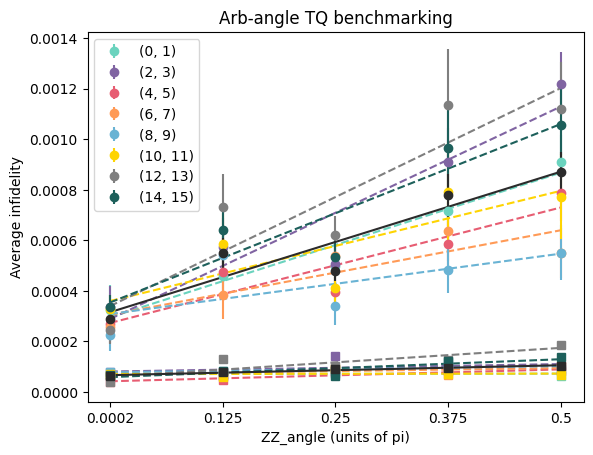

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

qtm_hex = [
    '#E1F6F2', '#A5E5D7', '#6AD3BE', '#30A08E', '#1D605B',
    '#E6E0EC', '#B3A2C7', '#8064A2', '#604A7B', '#403152',
    '#FCDFE4', '#F59EAF', '#E75D72', '#BB4658', '#7C3349',
    '#FFEBDD', '#FFC29A', '#FF9A56', '#E5803C', '#92542A',
    '#c3e1ee', '#96cae1', '#69B3D4', '#548faa', '#4a7d94',
    '#fff2b3', '#ffea81', '#FED402', '#cbaa02', '#b29401',
    '#F2F2F2', '#CACACA', '#7F7F7F', '#2B2B2B', '#000000',
]

# custom_colors = ['#E75D72', '#FF9A56', '#FED402', '#6AD3BE','#69B3D4', '#8064A2', '#7F7F7F'] # Red, Yellow, Blue
custom_colors = ['#6AD3BE', '#8064A2', '#E75D72', '#FF9A56', '#69B3D4', '#FED402', '#7F7F7F', '#1D605B'] 

ax = plt.subplot()

x = list(exp2.fid_avg.keys())
x.sort()

def fit_func(x, a, b):
    return a*x+b

for i in range(8):
    y1 = [1-exp2.fid_avg[angle][i] for angle in x]
    yerr1 = [exp2.fid_avg_std[angle][i] for angle in x]

    y2 = [exp2.leakage_rates[angle][i] for angle in x]
    yerr2 = [exp2.leakage_rates_stds[angle][i] for angle in x]

    popt, pcov = curve_fit(fit_func, x, y1)
    perr1 = np.sqrt(np.diag(pcov))
    xfit1 = np.linspace(x[0],x[-1],100)
    yfit1 = fit_func(xfit1, *popt)

    popt, pcov = curve_fit(fit_func, x, y2)
    perr2 = np.sqrt(np.diag(pcov))
    xfit2 = np.linspace(x[0],x[-1],100)
    yfit2 = fit_func(xfit1, *popt)

    plt.errorbar(x, y1, yerr=yerr1, fmt='o', color=custom_colors[i])
    plt.plot(xfit1, yfit1, '--', color=custom_colors[i], label='_nolegend_')

    plt.errorbar(x, y2, yerr=yerr2, fmt='s', color=custom_colors[i], label='_nolegend_')
    plt.plot(xfit2, yfit2, '--', color=custom_colors[i], label='_nolegend_')


# average
y1 = [1-np.mean(exp2.fid_avg[angle]) for angle in x]
yerr1 = [np.sqrt(sum([s**2 for s in exp2.fid_avg_std[angle]]))/len(exp2.fid_avg_std) for angle in x]


y2 = [exp2.mean_leakage_rate[angle] for angle in x]
yerr2 = [exp2.mean_leakage_std[angle] for angle in x]

popt, pcov = curve_fit(fit_func, x, y1)
perr1 = np.sqrt(np.diag(pcov))
xfit1 = np.linspace(x[0],x[-1],100)
yfit1 = fit_func(xfit1, *popt)

popt, pcov = curve_fit(fit_func, x, y2)
perr2 = np.sqrt(np.diag(pcov))
xfit2 = np.linspace(x[0],x[-1],100)
yfit2 = fit_func(xfit1, *popt)

plt.errorbar(x, y1, yerr=yerr1, fmt='o', color='#2B2B2B')
plt.plot(xfit1, yfit1, '-', color='#2B2B2B', label='_nolegend_')

plt.errorbar(x, y2, yerr=yerr2, fmt='s', color='#2B2B2B', label='_nolegend_')
plt.plot(xfit2, yfit2, '-', color='#2B2B2B', label='_nolegend_')

plt.xlabel('ZZ_angle (units of pi)')
plt.ylabel('Average infidelity')
plt.title('Arb-angle TQ benchmarking')
plt.xticks(ticks=x, labels=x)
plt.legend([(q, q+1) for q in range(0, 16, 2)])

# if savefig == True:
    # plt.savefig('arbrb_error_vs_angle.svg', format='svg')
plt.show()